In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import sys
from scipy.signal import savgol_filter

################path:엑셀파일 저장된 경로 , save_path: 그래프저장할경로, 그래프로 표시할 라인갯수#################################
path = 'E:/'
save_path = 'E:/'
line_num = 16
########################################################################################################################


y = ['y0', 'y1', 'y2', 'y3', 'y4', 'y5', 'y6', 'y7', 'y8', 'y9', 'y10', 'y11', 'y12', 'y13', 'y14', 'y15'][0:line_num]
file_list = os.listdir(path)
if not file_list:
    print('경로확인, 경로 지정안되었습니다.')
    sys.exit()
for file_name in file_list:
    if file_name.endswith(".csv"):
        df = pd.read_csv(os.path.join(path, file_name), sep='\t', header=None)  # encoding='CP949', sep= ''
        data = np.array(df)

        if line_num+2 == data.shape[1]:
            pass
        else:
            print('line 갯수를 확인해야합니다.\n 시스템을 종료합니다')
            sys.exit()

        load = data[:, len(y):len(y)+1]
        dis = data[:, len(y)+1:len(y)+2]

        num = np.shape(data)[0]
        x = np.arange(num)
        if num%2==0:
            win_length = num-1
        else:
            win_length = len(y[i])

        fig, ax1 = plt.subplots()
        ax2 = ax1.twinx()
        for i in range(0, len(y)):
            y[i] = data[:, i:i + 1]
            # y[i] = savgol_filter(y[i].flatten(),win_length,1)
            y[i] = savgol_filter(y[i].flatten(),201,1)

            ax1.plot(x, y[i], label=i + 1, linewidth=0.1)
        ax2.plot(x, load)
        ax2.plot(x, dis)

        ##그래프 설정 파트 #################################################
        ax1.set_ylabel('Sample Voltage') #y1축 이름
        ax2.set_ylabel('Load - Displacement') #y2축 이름
        ax1.set_xlabel('Time')    # x 축 이름
        ax1.set_ylim(6.8, 6.975)        #y축 스케일조절
        ax2.set_ylim(-10, 0)      #y2축 스케일조절
        # ax1.set_xlim(0,400)  # x축 스케일 조절

        plt.savefig(save_path + '/' + file_name + '.png', dpi=300)
        print(file_name, "완료!")
        plt.close(fig)
print('최종 끝')
#######

In [ ]:
""" macro 좌표 입력 """

import pyautogui
import time
start = time.time()

print(pyautogui.size())
print(pyautogui.position())

time.time()-start

In [ ]:
import pyautogui
import time

f = time.time()
for i in range(5):
    start = time.time()
    pyautogui.click(x=547, y=228) ##창 클릭 후 마우스 커서 위치
    pyautogui.press(['backspace']*(i+4))

    pyautogui.write(str(i+1)+'.csv') ##파일이름 입력
    pyautogui.click(x=61, y=55) ##시작 좌표

    time.sleep(2)

    pyautogui.click(x=619,y=321,clicks=2, interval=2)
    time.sleep(5.3)

    print(time.time()-start)

print(time.time()-f)

1_1.csv 시작!
1check.png 시작!


ParserError: Error tokenizing data. C error: Expected 1 fields in line 4, saw 2


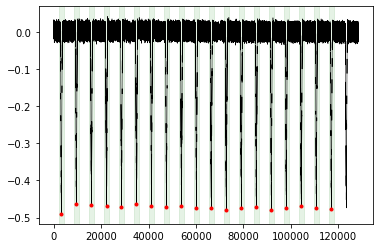

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from scipy.signal import find_peaks
import sys
import glob

##################################################
path = 'E:\C/'
save_path = 'E:\F/'
rate = 500 #받는속도
range_front =  1000 # 피크 앞뒤로 짜를 갯수
range_back = 1000#
term = 10 #중간에 몇초쉬었는지
##################################################


file_list = os.listdir(path)
count = 1
if not file_list:
    print('경로확인')
    sys.exit()

for file_name in file_list:

    print(file_name, "시작!")
    df = pd.read_csv(os.path.join(path, file_name), sep='\t', header=None)  # encoding='CP949', sep= ''
    data = np.array(df)

    load = data[:, 16:17]
    dis = data[:, 17:18]
    x = np.arange(np.shape(load)[0])
    block = dis.flatten() * -1   #displacement 로 피크 잡을시 dis변수사용  load사용하고 싶을시 load변수변경
    peaks, _ = find_peaks(block, distance= term*rate) #peak 받아냄
    peaks = np.delete(peaks,-1) #거리로하다보면 마지막 요소 생기는데 이거 삭제
    
    """"데이터 미리마다 짜르기"""
    for i in range(5):
        front_peaks_index, back_peaks_index = peaks[20*(i)], peaks[20*(i+1)-1]
        if count == 1:
            result = data[:back_peaks_index+term*rate, :]
        else:
            result = data[front_peaks_index-term*rate:back_peaks_index+term*rate, :]

        np.savetxt(save_path+file_name.split('.')[0]+'_'+str(count)+'.'+file_name.split('.')[1], result, delimiter='\t', fmt='%4e') #numpyarray 만드는 부분
        print(front_peaks_index, back_peaks_index)
        count += 1

    
    """ 피크마다자르기"""    
    # for i in peaks[0:len(peaks)]: # 첫번째 그래프빼고싶으면 1:len~~
    #     plt.axvspan(i - range_front, i + range_back, alpha=0.1, color='green')
    #     result = data[i-range_front:i+range_back+1 ,:]
    #     np.savetxt(save_path+file_name.split('.')[0]+'_'+str(count)+'.'+file_name.split('.')[1], result, delimiter='\t', fmt='%4e') #numpyarray 만드는 부분
    # 
    #     count += 1

    plt.plot(block*-1,c = 'black', linewidth=0.5)
    plt.plot(peaks, block[peaks]*-1, ".", c='red')
    plt.savefig(save_path+file_name.split('.')[0]+'check.png', dpi=300)
print('끄으으으으으으으읕')

In [15]:
print(peaks)

[  3191   9529  15872  22275  28567  34906  41221  47540  53859  60216
  66489  72828  79192  85525  91845  98150 104461 110842 117168 123468
 129817 136145 142499 148852 155180 161542 167874 174182 180543 186847
 193197 199540 205876 212208 218546 224903 231265 237603 243918 250300
 256631 262977 269348 275687 282024 288321 294676 301063 307398 313749
 320096 326412 332750 339059 345390 351733 358061 364434 370774 377127
 383493 389806 396158 402536 408868 415183 421510 427845 434161 440480
 446863 453191 459537 465838 472182 478517 484851 491199 497505 503862
 510172 516505 522859 529183 535512 541849 548160 554490 560804 567088
 573454 579789 586120 592436 598778 605098 611474 617813 624157 630511
 640006 648474 653980]
